In [3]:
import pandas as pd
import os
import json
from tqdm import tqdm
import networkx as nx
import semanticscholar as sch
import urllib
import json
import requests

In [ ]:
paper_attributes = pd.read_csv("paper_attributes.csv")
our_paper_attributes =  paper_attributes[paper_attributes['Attribute'].isin(['AA.AfId','AA.AfN','AA.AuId','AA.AuN','AA.S','AW','BT','BV','C.CId','C.CN','CC','CitCon','D','ECC','F.FId','F.FN','Id','Pt','RId','Ti','Y'])]
our_paper_attributes

In [6]:
cur_path = os.getcwd()

file_path_iclr = os.path.relpath('..\\data\\paper_data_mag\\MAG_ICLR.json', cur_path)
file_path_acl = os.path.relpath('..\\data\\paper_data_mag\\MAG_ACL.json', cur_path)
file_path_cvpr = os.path.relpath('..\\data\\paper_data_mag\\MAG_CVPR.json', cur_path)
file_path_emnlp = os.path.relpath('..\\data\\paper_data_mag\\MAG_EMNLP.json', cur_path)
file_path_iccv = os.path.relpath('..\\data\\paper_data_mag\\MAG_ICCV.json', cur_path)
file_path_iclr = os.path.relpath('..\\data\\paper_data_mag\\MAG_ICLR.json', cur_path)
file_path_icml = os.path.relpath('..\\data\\paper_data_mag\\MAG_ICML.json', cur_path)
file_path_naacl = os.path.relpath('..\\data\\paper_data_mag\\MAG_NAACL.json', cur_path)
file_path_neurips = os.path.relpath('..\\data\\paper_data_mag\\MAG_NEURIPS.json', cur_path)

In [8]:
def create_paper_data_df(file_path):
    with open(file_path) as f_in:
        paper_data_dict = json.load(f_in)
    paper_data_records = paper_data_dict['entities']
    paper_data_df = pd.DataFrame.from_records(paper_data_records)
    return paper_data_df

In [9]:
iclr_paper_data = create_paper_data_df(file_path_iclr)
references_list_iclr = [(rid,row['Id']) for idx,row in tqdm(iclr_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

acl_paper_data = create_paper_data_df(file_path_acl)
references_list_acl = [(rid,row['Id']) for idx,row in tqdm(acl_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

cvpr_paper_data = create_paper_data_df(file_path_cvpr)
references_list_cvpr = [(rid,row['Id']) for idx,row in tqdm(cvpr_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

emnlp_paper_data = create_paper_data_df(file_path_emnlp)
references_list_emnlp = [(rid,row['Id']) for idx,row in tqdm(emnlp_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

iccv_paper_data = create_paper_data_df(file_path_iccv)
references_list_iccv = [(rid,row['Id']) for idx,row in tqdm(iccv_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

icml_paper_data = create_paper_data_df(file_path_icml)
references_list_icml = [(rid,row['Id']) for idx,row in tqdm(icml_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

naacl_paper_data = create_paper_data_df(file_path_naacl)
references_list_naacl = [(rid,row['Id']) for idx,row in tqdm(naacl_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]

neurips_paper_data = create_paper_data_df(file_path_neurips)
references_list_neurips = [(rid,row['Id']) for idx,row in tqdm(neurips_paper_data.iterrows()) if type(row['RId'])!=float for rid in row['RId']]


2364it [00:00, 4228.68it/s]
4422it [00:00, 7224.68it/s]
8805it [00:01, 6417.77it/s]
3373it [00:00, 7154.41it/s]
3469it [00:00, 6844.01it/s]
5391it [00:00, 10540.57it/s]
2443it [00:00, 7659.06it/s]
4938it [00:00, 11929.97it/s]


In [ ]:
all_paper_data_df = pd.concat([iclr_paper_data, acl_paper_data, cvpr_paper_data, emnlp_paper_data, iccv_paper_data, icml_paper_data, naacl_paper_data, neurips_paper_data])
all_paper_data_df.to_pickle("..\\data\\all_paper_data.pkl")

In [23]:
all_paper_data_df = pd.read_pickle("..\\data\\all_paper_data.pkl")

In [12]:
reference_df_iclr = pd.DataFrame(references_list_iclr, columns=['this_paper_infected','got_infected_by'])
reference_df_acl = pd.DataFrame(references_list_acl, columns=['this_paper_infected','got_infected_by'])
reference_df_cvpr = pd.DataFrame(references_list_cvpr, columns=['this_paper_infected','got_infected_by'])
reference_df_emnlp = pd.DataFrame(references_list_emnlp, columns=['this_paper_infected','got_infected_by'])
reference_df_iccv = pd.DataFrame(references_list_iccv, columns=['this_paper_infected','got_infected_by'])
reference_df_icml = pd.DataFrame(references_list_icml, columns=['this_paper_infected','got_infected_by'])
reference_df_naacl = pd.DataFrame(references_list_naacl, columns=['this_paper_infected','got_infected_by'])
reference_df_neurips = pd.DataFrame(references_list_neurips, columns=['this_paper_infected','got_infected_by'])

reference_df = pd.concat([reference_df_iclr, reference_df_acl, reference_df_cvpr, reference_df_emnlp, reference_df_iccv, reference_df_icml, reference_df_naacl, reference_df_neurips])
reference_df.to_pickle("..\\data\\networks\\citation_network.pkl")

In [15]:
reference_df

,this_paper_infected,got_infected_by
0,2064675550,2964308564
1,2157331557,2964308564
2,3037950864,2964308564
3,2132339004,2964308564
4,6908809,2964308564
...,...,...
37370,152506389,132146827
37371,2109689843,132146827
37372,2141789531,132146827
37373,1757317927,132146827


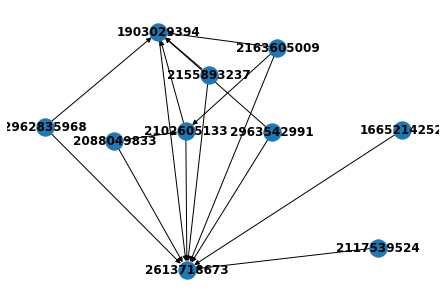

In [174]:
G_citation = nx.from_pandas_edgelist(reference_df, source='this_paper_infected', target='got_infected_by',create_using=nx.DiGraph())
r = list(reference_df_neurips['this_paper_infected'][:9])
r.append(2613718673)
k = G_citation.subgraph(r)
nx.draw(k,with_labels=True, font_weight='bold')

In [27]:
valid_idx_infection = []
for idx,row in tqdm(reference_df.iterrows()):
    
    source = row['this_paper_infected']
    destination = row['got_infected_by']
    if source in all_paper_data_df['Id'].values and destination in all_paper_data_df['Id'].values:
        source_abstract = all_paper_data_df[all_paper_data_df['Id'] == source]['AW'].values[0]
        dest_abstract = all_paper_data_df[all_paper_data_df['Id'] == destination]['AW'].values[0]
        source_fos = all_paper_data_df[all_paper_data_df['Id'] == source]['F'].values[0]
        dest_fos = all_paper_data_df[all_paper_data_df['Id'] == destination]['F'].values[0]
        if type(source_abstract) != float and type(dest_abstract) != float and type(source_fos) != float and type(dest_fos) != float:
            #abstract overlap
            source_abstract = set(source_abstract)
            dest_abstract = set(dest_abstract)
            abstract_overlap_score = len(set.intersection(source_abstract,dest_abstract))/len(source_abstract)
            #FOS overlap
            source_fos = set([pair['FN'] for pair in source_fos])
            dest_fos = set([pair['FN'] for pair in dest_fos])
            fos_overlap_score = len(set.intersection(source_fos,dest_fos))/len(source_fos)
            if abstract_overlap_score > 0.20 and fos_overlap_score > 0.30:
                valid_idx_infection.append(idx)


761008it [07:29, 1694.06it/s]


In [32]:
infected_df = reference_df.iloc[valid_idx_infection, :]
reference_df.to_pickle("..\\data\\networks\\citation_infection_network.pkl")

In [ ]:
'''def is_infection(source,destination,all_paper_data_df):
    
    if source in all_paper_data_df['Id'].values and destination in all_paper_data_df['Id'].values:
        source_abstract = all_paper_data_df[all_paper_data_df['Id'] == source]['AW'].values[0]
        dest_abstract = all_paper_data_df[all_paper_data_df['Id'] == destination]['AW'].values[0]
        source_fos = all_paper_data_df[all_paper_data_df['Id'] == source]['F'].values[0]
        dest_fos = all_paper_data_df[all_paper_data_df['Id'] == destination]['F'].values[0]
        if type(source_abstract) != float and type(dest_abstract) != float and type(source_fos) != float and type(dest_fos) != float:
            #abstract overlap
            source_abstract = set(source_abstract)
            dest_abstract = set(dest_abstract)
            abstract_overlap_score = len(set.intersection(source_abstract,dest_abstract))/len(source_abstract)
            #FOS overlap
            source_fos = set([pair['FN'] for pair in source_fos])
            dest_fos = set([pair['FN'] for pair in dest_fos])
            fos_overlap_score = len(set.intersection(source_fos,dest_fos))/len(source_fos)
            if abstract_overlap_score >= 0.20 and fos_overlap_score >= 0.40:
                return True

#reference_df_copy = reference_df.copy()
#reference_df_copy['infection'] = reference_df_copy.apply(lambda row : is_infection(row['this_paper_infected'],row['got_infected_by'],all_paper_data_df))
'''